In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cars93.csv')
df

id Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0    1        Acura  Integra    Small       12.9   15.9       18.8        25   
1    2        Acura   Legend  Midsize       29.2   33.9       38.7        18   
2    3         Audi       90  Compact       25.9   29.1       32.3        20   
3    4         Audi      100  Midsize       30.8   37.7       44.6        19   
4    5          BMW     535i  Midsize       23.7   30.0       36.2        22   
..  ..          ...      ...      ...        ...    ...        ...       ...   
88  89   Volkswagen  Eurovan      Van       16.6   19.7       22.7        17   
89  90   Volkswagen   Passat  Compact       17.6   20.0       22.4        21   
90  91   Volkswagen  Corrado   Sporty       22.9   23.3       23.7        18   
91  92        Volvo      240  Compact       21.8   22.7       23.5        21   
92  93        Volvo      850  Midsize       24.8   26.7       28.5        20   

    MPG.highway             AirBags  ... Passengers Length  Wheelbase  Width  \
0            31                None  ...          5    177        102     68   
1            25  Driver & Passenger  ...          5    195        115     71   
2            26         Driver only  ...          5    180        102     67   
3            26                 NaN  ...          6    193        106     70   
4            30         Driver only  ...          4    186        109     69   
..          ...                 ...  ...        ...    ...        ...    ...   
88           21                None  ...          7    187        115     72   
89           30                None  ...          5    180        103     67   
90           25                None  ...          4    159         97     66   
91           28         Driver only  ...          5    190        104     67   
92           28  Driver & Passenger  ...          5    184        105     69   

    Turn.circle  Rear.seat.room Luggage.room  Weight   Origin  \
0            37            26.5         11.0    2705  non-USA   
1            38            30.0         15.0    3560  non-USA   
2            37            28.0         14.0    3375  non-USA   
3            37            31.0         17.0    3405  non-USA   
4            39            27.0         13.0    3640  non-USA   
..          ...             ...          ...     ...      ...   
88           38            34.0          NaN    3960  non-USA   
89           35            31.5         14.0    2985  non-USA   
90           36            26.0         15.0    2810  non-USA   
91           37            29.5         14.0    2985  non-USA   
92           38            30.0         15.0    3245  non-USA   

                  Make  
0        Acura Integra  
1         Acura Legend  
2              Audi 90  
3             Audi 100  
4             BMW 535i  
..                 ...  
88  Volkswagen Eurovan  
89   Volkswagen Passat  
90  Volkswagen Corrado  
91           Volvo 240  
92           Volvo 850  

[93 rows x 28 columns]

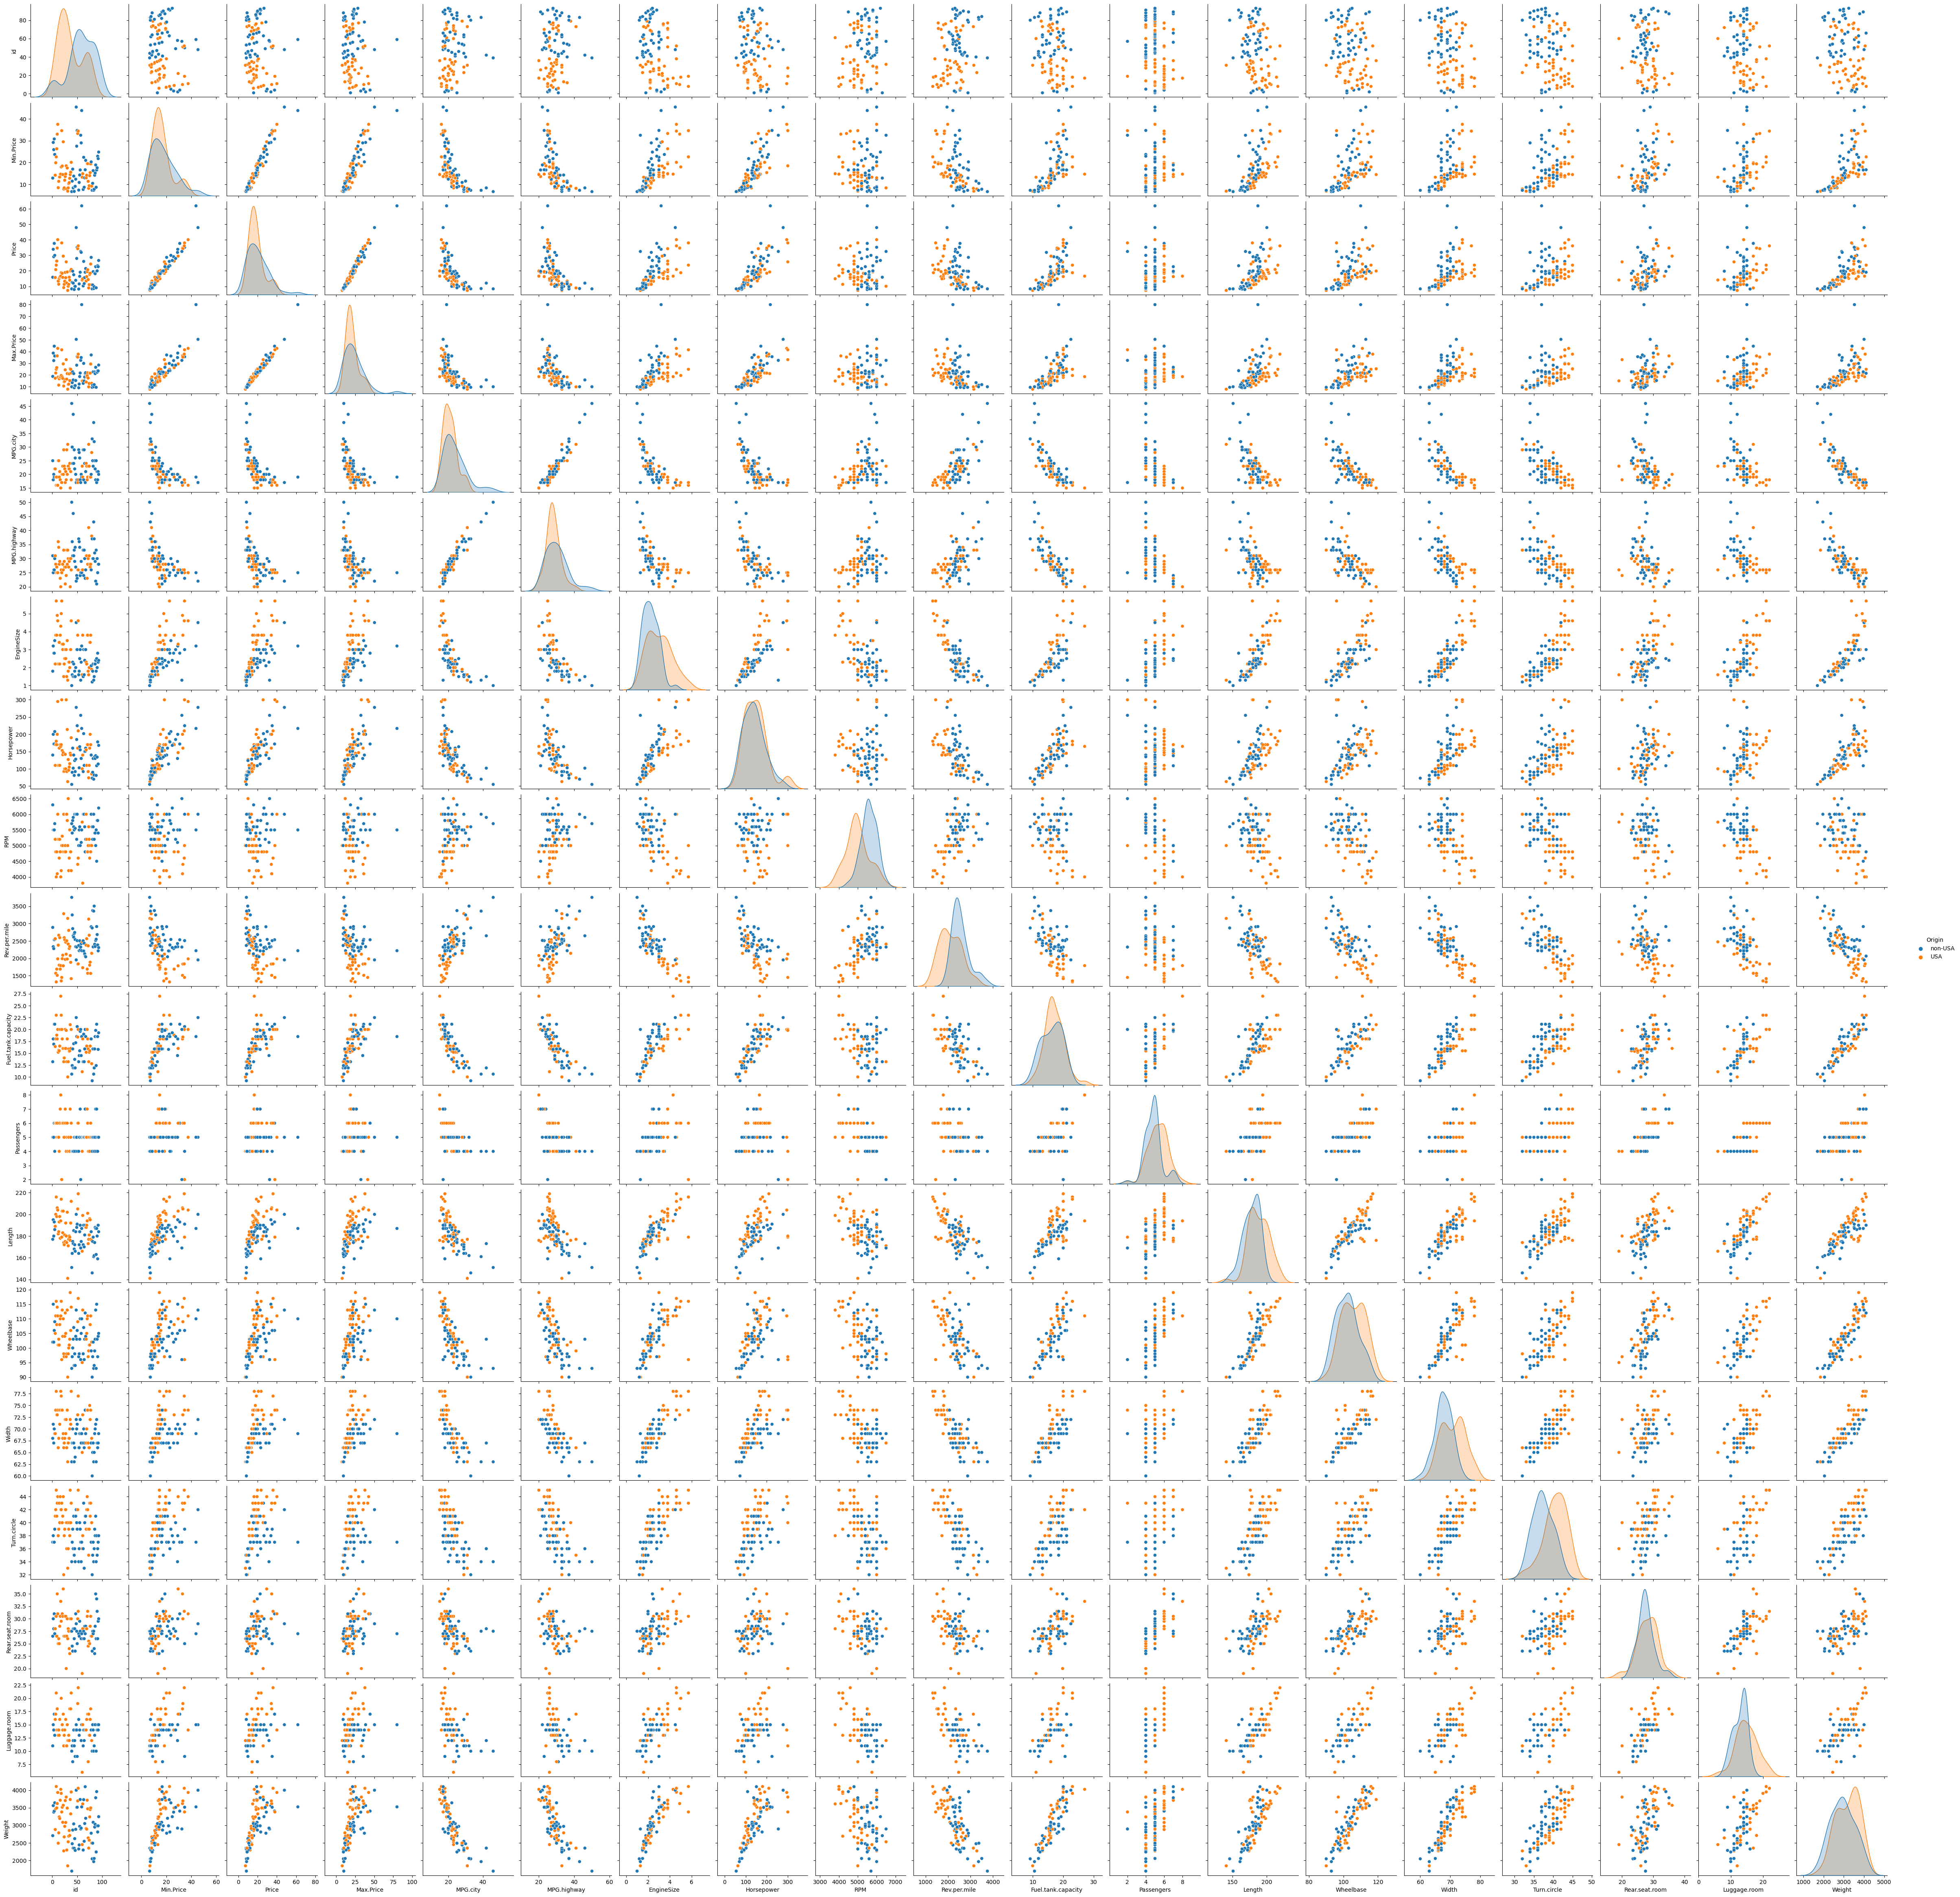

In [3]:
sns.pairplot(df, hue='Origin')
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [5]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [6]:
x = df.drop(['id','Make','Model','Origin'],axis=1)
y = df['Origin']

In [7]:
for i in df.columns:
        if (df[i].dtype == object):
            mode = df[i].mode()[0]
            df[i] = df[i].fillna(mode)
        else:
            mean = df[i].mean()
            df[i] = df[i].fillna(mean)             

In [8]:
def catcon(df): 
        cat = []
        con = []
        for i in df.columns:
            if (df[i].dtype == object):
                cat.append(i)
            else:
                con.append(i)
        return cat,con         
    
cat,con = catcon(x)

In [11]:
x1 = pd.get_dummies(x[cat])
    
mm = MinMaxScaler()
x2 = pd.DataFrame(mm.fit_transform(df[con]),columns = con)
xnew = x2.join(x1)

le = LabelEncoder()
ynew = le.fit_transform(df[['Origin']])

In [16]:
def data_algo(df, algorithms):
    xtrain, xtest, ytrain, ytest = train_test_split(xnew, ynew, test_size=0.25, random_state=30)

    for algorithm in algorithms:
        print(f"{algorithm}...")

        # Fit the algorithm to the training data
        algorithm.fit(xtrain, ytrain)

        # Predict the target variable for the test data
        y_pred = algorithm.predict(xtest)

        # Calculate the accuracy score
        accuracy = accuracy_score(ytest, y_pred)
        print(f"Accuracy: {accuracy}\n")

# Usage example
algorithms = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB()
]
data_algo(df, algorithms)

LogisticRegression()...
Accuracy: 0.8333333333333334

DecisionTreeClassifier()...
Accuracy: 0.8333333333333334

KNeighborsClassifier()...
Accuracy: 0.5416666666666666

RandomForestClassifier()...
Accuracy: 0.8333333333333334

SVC()...
Accuracy: 0.75

GaussianNB()...
Accuracy: 0.8333333333333334

